In [8]:
import sys
sys.path.insert(0, "../")

from utils.ptq_utils import get_fid_from_qparams

# Optimal quantiles for activations

In [ ]:
tmp_data_dir = "/media/data/fid_data_for_models" # path where intermediate data will be stored
generated_data_dir = "/media/data/mlproject" # path where prepare_data.py script generated data

In [7]:
import pandas as pd
df = pd.DataFrame(columns=["quant_bits", "FID", "per_channel", "qFID", "quantile"])

for quantile in [0.999, 0.9999, 1.0]:
    for n_bits in [4, 8]:
        for per_channel in [True, False]:
            q_params = {'q_max': quantile, 'q_min': 1 - quantile,
                        'q_max_w': 0.9999, 'q_min_w': 1 - 0.9999,
                        'bits_w': n_bits, "per_channel":per_channel}

            data_dir = f'{tmp_data_dir}/static_q_max_{quantile}_{n_bits}_bits_perchannel{per_channel}'

            qfid = get_fid_from_qparams(q_params, data_dir, "../weights.pth",
                                        reference_data=generated_data_dir + "/fp_data",
                                        use_cache=True, qfid=True)

            fid = get_fid_from_qparams(q_params, data_dir, "../weights.pth",
                                       reference_data=generated_data_dir + "/real_images",
                                       use_cache=True, qfid=False)

            print(f'Quantile {quantile}, {n_bits} bits, per_channel={per_channel}')
            print('FID:', fid)
            print('qFID:', qfid)

            df = df.append({"quant_bits":n_bits, "per_channel":per_channel,
                            "FID":fid, "qFID":qfid, "quantile_max":quantile}, ignore_index=True)

Quantile 0.999, 4 bits, per_channel=True
FID: 90.01769988668357
qFID: 81.51614788690927
Quantile 0.999, 4 bits, per_channel=False
FID: 99.76829116557016
qFID: 92.40178222680652
Quantile 0.999, 8 bits, per_channel=True
FID: 79.1000489278224
qFID: 68.0925972922924
Quantile 0.999, 8 bits, per_channel=False
FID: 80.5504009308446
qFID: 69.59355426466777
Quantile 0.9999, 4 bits, per_channel=True
FID: 73.06216148768311
qFID: 60.37502559153148
Quantile 0.9999, 4 bits, per_channel=False
FID: 73.60142592185844
qFID: 62.41389689020764
Quantile 0.9999, 8 bits, per_channel=True
FID: 66.62009921452204
qFID: 51.26621419830252
Quantile 0.9999, 8 bits, per_channel=False
FID: 65.97420333769969
qFID: 50.44323084888077
Quantile 1.0, 4 bits, per_channel=True
FID: 99.8521368650741
qFID: 87.29314371344347
Quantile 1.0, 4 bits, per_channel=False
FID: 98.28435557688542
qFID: 86.6800162818989
Quantile 1.0, 8 bits, per_channel=True
FID: 94.8197253731006
qFID: 78.17749767742578
Quantile 1.0, 8 bits, per_channel=F

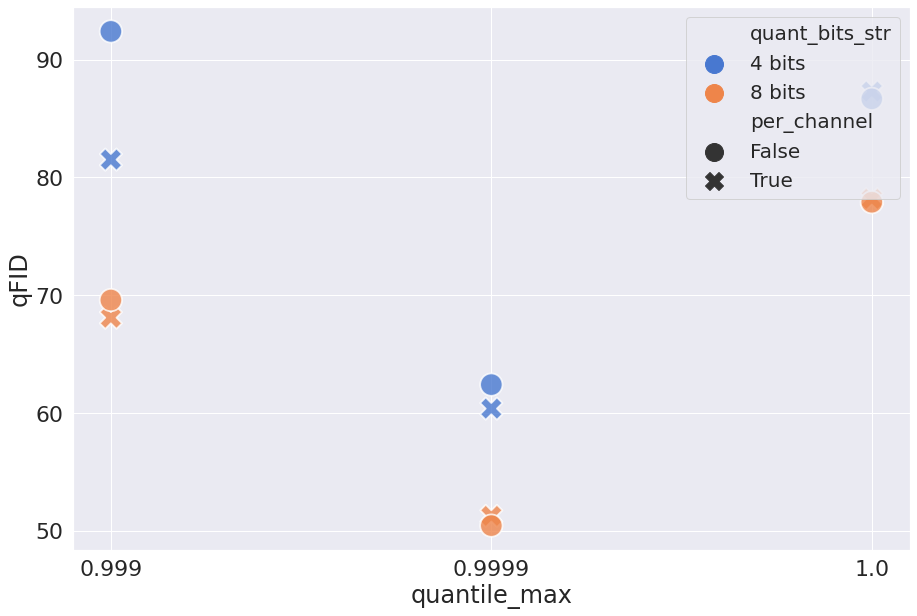

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)

plt.figure(figsize=(15, 10))
df["bits for weights"] = df["quant_bits"].apply(float).apply(int).apply(str) + ' bits'
df["per channel"] = df["per_channel"].apply(bool).apply(int).apply(str)

ax = sns.scatterplot(x="quantile_max", y="qFID", hue="bits for weights", style="per channel", data=df,
                     palette="muted", s=500, alpha=0.8)


lgnd = plt.legend(loc="best", numpoints=1, fontsize=20, markerscale=3)
plt.savefig("quantiles.pdf")
plt.tight_layout(pad=1.4)
plt.show()

# Optimal quantiles for weights

In [ ]:
tmp_data_dir = "/media/data/fid_data_for_models_w" # path where intermediate data will be stored
generated_data_dir = "/media/data/mlproject" # path where prepare_data.py script generated data

In [6]:
import pandas as pd
df = pd.DataFrame(columns=["quant_bits", "FID", "per_channel", "qFID", "quantile_max"])

for quantile in [0.99, 0.999, 0.9999, 1.0]:
    for n_bits in [4, 8]:
        for per_channel in [True, False]:
            q_params = {'q_max_w': quantile, 'q_min_w': 1 - quantile,
                        'q_max': 0.9999, 'q_min': 1 - 0.9999,
                        'bits_w': n_bits, "per_channel":per_channel}

            data_dir = f'{tmp_data_dir}/static_q_max_{quantile}_{n_bits}_bits_perchannel{per_channel}'

            qfid = get_fid_from_qparams(q_params, data_dir, "../weights.pth",
                                        reference_data=generated_data_dir + "/fp_data",
                                        use_cache=True, qfid=True)

            fid = get_fid_from_qparams(q_params, data_dir, "../weights.pth",
                                       reference_data=generated_data_dir + "/real_images",
                                       use_cache=True, qfid=False)

            print(f'Quantile {quantile}, {n_bits} bits, per_channel={per_channel}')
            print('FID:', fid)
            print('qFID:', qfid)

            df = df.append({"quant_bits":n_bits, "per_channel":per_channel,
                            "FID":fid, "qFID":qfid, "quantile_max":quantile}, ignore_index=True)

Quantile 0.99, 4 bits, per_channel=True
FID: 73.59410295560212
qFID: 60.713082539952325
Quantile 0.99, 4 bits, per_channel=False
FID: 79.09553945299842
qFID: 66.57182289384863
Quantile 0.99, 8 bits, per_channel=True
FID: 67.03115551253512
qFID: 51.2068903144571
Quantile 0.99, 8 bits, per_channel=False
FID: 72.20624950837447
qFID: 58.24588742587446
Quantile 0.999, 4 bits, per_channel=True
FID: 73.51038870015452
qFID: 60.79981555933523
Quantile 0.999, 4 bits, per_channel=False
FID: 71.2230539491934
qFID: 60.639416198377575
Quantile 0.999, 8 bits, per_channel=True
FID: 66.8234583938966
qFID: 51.35026474460534
Quantile 0.999, 8 bits, per_channel=False
FID: 67.22445449929438
qFID: 51.923778056559115
Quantile 0.9999, 4 bits, per_channel=True
FID: 73.06216148768311
qFID: 60.37502559153148
Quantile 0.9999, 4 bits, per_channel=False
FID: 73.60105724835188
qFID: 62.41385903394382
Quantile 0.9999, 8 bits, per_channel=True
FID: 66.6199764671228
qFID: 51.26619334092885
Quantile 0.9999, 8 bits, per_

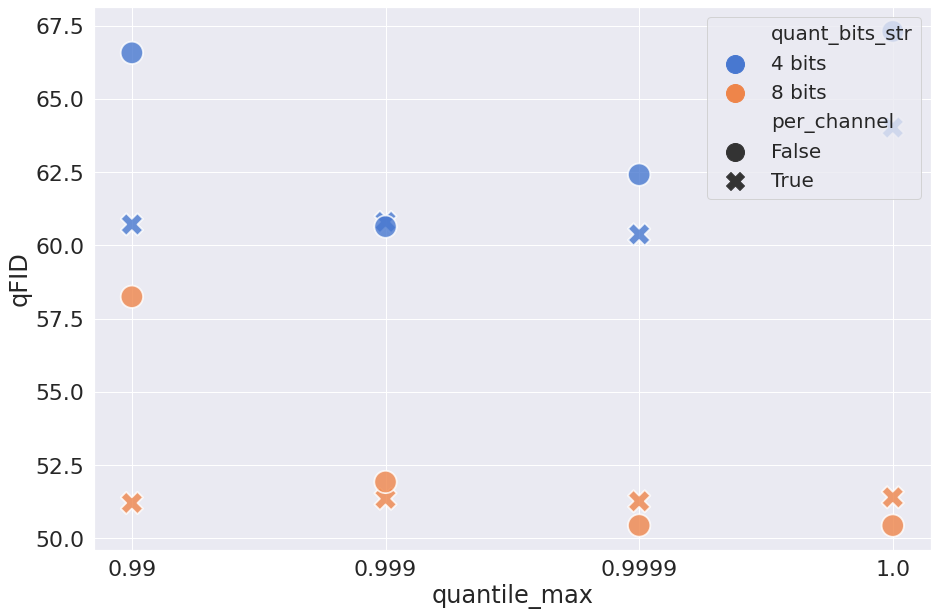

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)

plt.figure(figsize=(15, 10))
df["quantile_max"] = df["quantile_max"].apply(str)
df["quant_bits_str"] = df["quant_bits"].apply(float).apply(int).apply(str) + ' bits'

ax = sns.scatterplot(x="quantile_max", y="qFID", hue="quant_bits_str", style="per_channel", data=df,
                     palette="muted", s=500, alpha=0.8)


lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=20, markerscale=3)
plt.savefig("reduce_range.png", dpi=250)
plt.show()